In [1]:
# Jacob's First Kaggle Notebook

In [2]:
import json
import pandas as pd

#-- Load D&J messages into Python dictionary object

with open('/kaggle/input/danieljacobgchattranscript/messages.json', encoding='utf-8') as f:
    data = json.load(f)

In [3]:
#-- Data type
print('Data is', type(data))

Data is <class 'dict'>


In [4]:
#-- Flatten and normalize nested JSON data
df = pd.json_normalize(data, 'messages')

#-- Print columns of Pandas Dataframe object
print(type(df))
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['created_date', 'text', 'topic_id', 'creator.name', 'creator.email',
       'creator.user_type', 'annotations', 'attached_files', 'reactions'],
      dtype='object')


In [5]:
#-- Pandas sample(n) will display n random rows of your data
df.sample(5)

,created_date,text,topic_id,creator.name,creator.email,creator.user_type,annotations,attached_files,reactions
20573,"Tuesday, March 3, 2020 at 8:16:19 PM UTC",nope,-t3zIwqozhM,Daniel Dichter,daniel.w.dichter@gmail.com,Human,NaN,NaN,NaN
4195,"Tuesday, May 6, 2014 at 5:58:22 PM UTC","also, the lighting is extremely aggressive and...",q7KbJ-x9nDI,Daniel Dichter,daniel.w.dichter@gmail.com,Human,NaN,NaN,NaN
1589,"Wednesday, November 6, 2013 at 4:26:44 PM UTC",One will,oBoX0g3E-9w,Jacob Dichter,JacobDichter@gmail.com,Human,NaN,NaN,NaN
39575,"Wednesday, April 6, 2022 at 2:01:35 AM UTC",i recall that quick bit from the hans piece we...,zMp4DjK4qK4,Daniel Dichter,daniel.w.dichter@gmail.com,Human,NaN,NaN,NaN
19763,"Wednesday, January 22, 2020 at 2:40:39 PM UTC",Which traits?,I5pKt0JHrNY,Jacob Dichter,JacobDichter@gmail.com,Human,NaN,NaN,NaN


In [6]:
#-- Pandas head() will display the first n rows
df.head()

,created_date,text,topic_id,creator.name,creator.email,creator.user_type,annotations,attached_files,reactions
0,"Thursday, May 30, 2013 at 11:20:05 PM UTC",Rofl After Earth,S4RwO-AUc8w,Jacob Dichter,JacobDichter@gmail.com,Human,NaN,NaN,NaN
1,"Thursday, May 30, 2013 at 11:20:06 PM UTC",Sure,cpL3_hkFoPM,Jacob Dichter,JacobDichter@gmail.com,Human,NaN,NaN,NaN
2,"Thursday, May 30, 2013 at 11:20:11 PM UTC",excellente,k95_DK2UE-E,Daniel Dichter,daniel.w.dichter@gmail.com,Human,NaN,NaN,NaN
3,"Thursday, May 30, 2013 at 11:20:57 PM UTC",You may notice one of the reviews said somethi...,cHRJBGF7reA,Jacob Dichter,JacobDichter@gmail.com,Human,NaN,NaN,NaN
4,"Thursday, May 30, 2013 at 11:20:58 PM UTC",lol,S8GzbSOXv-E,Jacob Dichter,JacobDichter@gmail.com,Human,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43523 entries, 0 to 43522
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   created_date       43523 non-null  object
 1   text               42804 non-null  object
 2   topic_id           43523 non-null  object
 3   creator.name       43523 non-null  object
 4   creator.email      43523 non-null  object
 5   creator.user_type  43523 non-null  object
 6   annotations        2206 non-null   object
 7   attached_files     118 non-null    object
 8   reactions          16 non-null     object
dtypes: object(9)
memory usage: 3.0+ MB


In [8]:
df.describe()

,created_date,text,topic_id,creator.name,creator.email,creator.user_type,annotations,attached_files,reactions
count,43523,42804,43523,43523,43523,43523,2206,118,16
unique,43368,37522,43523,2,2,1,2179,93,7
top,"Wednesday, September 4, 2013 at 4:29:44 PM UTC",nice,S4RwO-AUc8w,Daniel Dichter,daniel.w.dichter@gmail.com,Human,"[{'start_index': 60, 'length': 72, 'url_metada...","[{'original_name': 'image.png', 'export_name':...","[{'emoji': {'unicode': '👍'}, 'reactor_emails':..."
freq,3,185,1,23225,23225,43523,8,25,9


In [9]:
print(df.shape)

(43523, 9)


In [10]:
#-- Drop unwanted columns
unwanted_cols = ['topic_id','creator.email','creator.user_type','annotations','attached_files','reactions']
df = df.drop(columns=unwanted_cols)

print(df.columns)

Index(['created_date', 'text', 'creator.name'], dtype='object')


In [11]:
#-- Confirm Pandas Dataframe is now Date, Text, Creator
df.sample(5)

,created_date,text,creator.name
36418,"Monday, November 22, 2021 at 7:23:15 PM UTC",Would respect this more if he declined and cit...,Daniel Dichter
3028,"Wednesday, February 5, 2014 at 11:25:08 PM UTC",Are you going hipster on Jeremy Soule now too?,Jacob Dichter
40776,"Thursday, June 9, 2022 at 7:43:01 PM UTC",NaN,Daniel Dichter
29258,"Wednesday, February 17, 2021 at 8:10:09 PM UTC","wiki cites ""perceived ease-of-use and reliabil...",Daniel Dichter
12815,"Sunday, January 20, 2019 at 11:32:14 PM UTC",One of those classes is an acting class,Jacob Dichter


In [12]:
print(type(df['created_date'][0]))
df.loc()

<class 'str'>


In [13]:
#-- Create date_series which converts created_date STRING to DATETIME type
date_series = pd.to_datetime(df['created_date'],format='%A, %B %d, %Y at %I:%M:%S %p UTC')

#-- Add date_series to the DataFrame
df['date'] = date_series

In [14]:
df.sample(10)

creator = df['creator.name']
df['creator'] = creator
df.head()
df.drop(columns=['creator.name'])

,created_date,text,date,creator
0,"Thursday, May 30, 2013 at 11:20:05 PM UTC",Rofl After Earth,2013-05-30 23:20:05,Jacob Dichter
1,"Thursday, May 30, 2013 at 11:20:06 PM UTC",Sure,2013-05-30 23:20:06,Jacob Dichter
2,"Thursday, May 30, 2013 at 11:20:11 PM UTC",excellente,2013-05-30 23:20:11,Daniel Dichter
3,"Thursday, May 30, 2013 at 11:20:57 PM UTC",You may notice one of the reviews said somethi...,2013-05-30 23:20:57,Jacob Dichter
4,"Thursday, May 30, 2013 at 11:20:58 PM UTC",lol,2013-05-30 23:20:58,Jacob Dichter
...,...,...,...,...
43518,"Friday, February 17, 2023 at 3:21:00 AM UTC",NaN,2023-02-17 03:21:00,Jacob Dichter
43519,"Friday, February 17, 2023 at 3:57:39 AM UTC",I was thinking about this exchange this week!,2023-02-17 03:57:39,Daniel Dichter
43520,"Friday, February 17, 2023 at 3:57:53 AM UTC",But as written in the movie. It bears revisiting,2023-02-17 03:57:53,Daniel Dichter
43521,"Friday, February 17, 2023 at 3:58:24 AM UTC",It is deep,2023-02-17 03:58:24,Daniel Dichter


In [15]:
#-- EXTRACT Year and Month from DATETIME Series

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.to_period('M')

In [34]:
#-- GROUP by YEAR and CREATOR

yearly_count = df.groupby(['year', 'creator']).size().reset_index(name='message_count')
print(yearly_count)
print(type(yearly_count))

    year         creator  message_count
0   2013  Daniel Dichter           1410
1   2013   Jacob Dichter           1337
2   2014  Daniel Dichter           1390
3   2014   Jacob Dichter           1124
4   2015  Daniel Dichter            355
5   2015   Jacob Dichter            274
6   2016  Daniel Dichter            140
7   2016   Jacob Dichter            143
8   2017  Daniel Dichter           1203
9   2017   Jacob Dichter           1187
10  2018  Daniel Dichter           2139
11  2018   Jacob Dichter           1955
12  2019  Daniel Dichter           3301
13  2019   Jacob Dichter           3488
14  2020  Daniel Dichter           4328
15  2020   Jacob Dichter           3679
16  2021  Daniel Dichter           5463
17  2021   Jacob Dichter           4404
18  2022  Daniel Dichter           3311
19  2022   Jacob Dichter           2554
20  2023  Daniel Dichter            185
21  2023   Jacob Dichter            153
<class 'pandas.core.frame.DataFrame'>


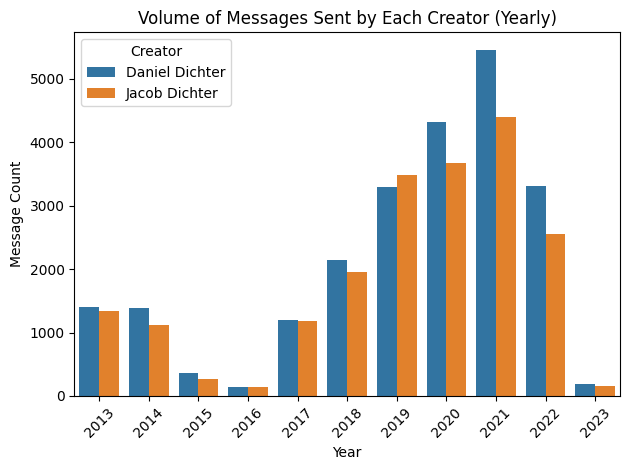

In [17]:
#-- VISUALIZE messages by YEAR and CREATOR

import matplotlib.pyplot as plt
import seaborn as sns

# sns.set(style='whitegrid')

# plt.figure(figsize=(10,6))

#-- GENERATE Barplot visualization
sns.barplot(x='year', y='message_count', hue='creator', data=yearly_count)

plt.title('Volume of Messages Sent by Each Creator (Yearly)')
plt.xlabel('Year')
plt.ylabel('Message Count')
plt.legend(title='Creator')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
#-- GROUP by MONTH-YEAR and CREATOR

monthly_count = df.groupby(['month', 'creator']).size().reset_index(name='message_count')
print(monthly_count)
print(type(monthly_count))

       month         creator  message_count
0    2013-05  Daniel Dichter             13
1    2013-05   Jacob Dichter             12
2    2013-06  Daniel Dichter             66
3    2013-06   Jacob Dichter             56
4    2013-07  Daniel Dichter            103
..       ...             ...            ...
208  2022-12   Jacob Dichter            126
209  2023-01  Daniel Dichter            123
210  2023-01   Jacob Dichter             95
211  2023-02  Daniel Dichter             62
212  2023-02   Jacob Dichter             58

[213 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


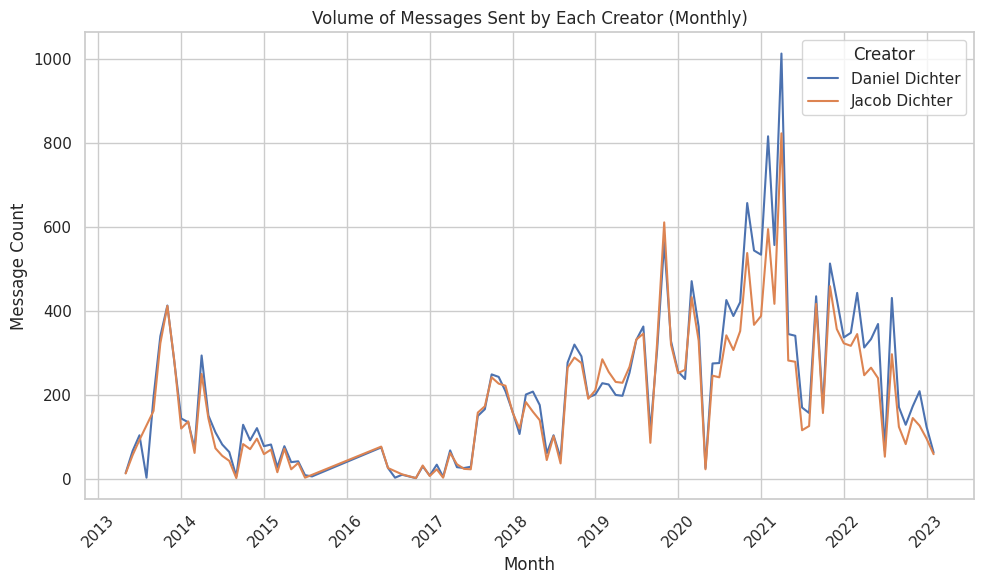

In [19]:
#-- VISUALIZE messages by MONTH and CREATOR

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

plt.figure(figsize=(10,6))


#-- {REQUIRED FOR LINECHART} Convert dtype Period[M] -> datetime64[ns]
monthly_count['month'] = monthly_count['month'].dt.to_timestamp()

#-- GENERATE Line Chart visualization
sns.lineplot(x='month', y='message_count', hue='creator', data=monthly_count)

plt.title('Volume of Messages Sent by Each Creator (Monthly)')
plt.xlabel('Month')
plt.ylabel('Message Count')
plt.legend(title='Creator')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
#-- ALTERNATE VISUALIZATION LIBRARIES

#-- ALTAIR

import altair as alt

yearly_count = pd.DataFrame(data)

# Create the Altair bar chart
chart = alt.Chart(yearly_count).mark_bar().encode(
    x=alt.X('year:O', title='Year'),  # Using ordinal type for years
    y=alt.Y('message_count:Q', title='Message Count'),  # Quantitative for message counts
    color='creator:N',  # Nominal for creator to differentiate colors
    tooltip=['year:O', 'creator:N', 'message_count:Q']  # Tooltips for interactivity
).properties(
    title='Volume of Messages Sent by Each Creator (Yearly)',
    width=600,
    height=400
).configure_axisX(
    labelAngle=45  # Rotate x-axis labels for better readability
)

# Display the chart
chart

alt.Chart(...)